In [77]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift
from PIL import Image

size = 100, 100

In [78]:
img_names = ["shapes.png", "strawberry.png"]
#img_names = ["coins.png", "kiwi.png"]
ext_names = ["coins.png", "kiwi.png"]
images = [i for i in img_names]
ext_images = [i for i in ext_names]

In [79]:
def plot_three_images(figure_title, image1, label1,
                      image2, label2, image3, label3):
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 3, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    fig.add_subplot(1, 3, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)

    # Display the third image
    fig.add_subplot(1, 3, 3)
    plt.imshow(image3)
    plt.axis('off')
    plt.title(label3)

    plt.show()

(683, 700)
(700, 683, 3)
(98, 100)
(3, 9800)
(9800,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


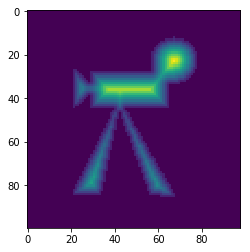

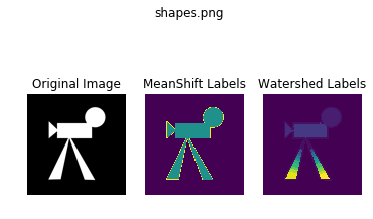

(1255, 977)
(977, 1255, 4)
(100, 77)
(3, 7700)
(7700,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


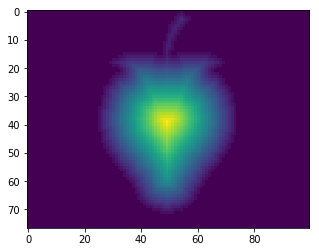

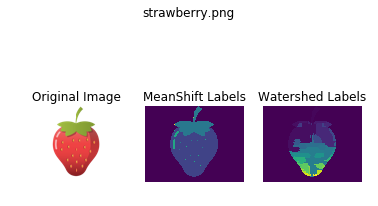

In [82]:
for img_path in images:
    img = Image.open(img_path)
    print(img.size)
    shape = np.shape(img)
    print(shape)
    img.thumbnail(size)  # Convert the image to 100 x 100
    img_size = img.size
    print(img_size)
    img_size = [img_size[1],img_size[0]]
    # Convert the image to a numpy matrix
    img_mat = np.array(img)[:, :, :3]
    size_mat = img_mat.size
    redImg = img_mat[:, :, 2]
    redImg_f = redImg.flatten()
    greenImg = img_mat[:, :, 1]
    greenImg_f = greenImg.flatten()
    blueImg = img_mat[:, :, 0]
    blueImg_f = blueImg.flatten()
    colour_samples = np.array([redImg_f,greenImg_f,blueImg_f]).T
    print(np.shape(colour_samples.T))
    ms_clf = MeanShift(bin_seeding=True)
    ms_labels = ms_clf.fit_predict(colour_samples)
    print(np.shape(ms_labels))
    ms_labels = np.reshape(ms_labels, img_size)
    plt.imshow(ms_labels)

    
    #test 2
    # TODO: perform Watershed on image
    # Follow the hints in the lab spec.

    # Step 1 - Convert the image to gray scale
    # and convert the image to a numpy matrix
    img_array = np.array(img.convert("L"))
    #print(img_array.size)
    #plt.imshow(img_array)
	
    # Step 2 - Calculate the distance transform
    # Hint: use     ndi.distance_transform_edt(img_array)
    distance = ndi.distance_transform_edt(img_array)
    plt.imshow(distance)
	
    # Step 3 - Generate the watershed markers
    # Hint: use the peak_local_max() function from the skimage.feature library
    # to get the local maximum values and then convert them to markers
    # using ndi.label() -- note the markers are the 0th output to this function
    peak = peak_local_max(distance,indices=False,labels= img_array)
    markers = ndi.label(peak)[0]
    print(markers)
	
    # Step 4 - Perform watershed and store the labels
    # Hint: use the watershed() function from the skimage.morphology library
    # with three inputs: -distance, markers and your image array as a mask
    
    ws_labels = watershed(-distance, markers,mask= img_array)

    # Display the results
    plot_three_images(img_path, img, "Original Image", ms_labels, "MeanShift Labels",
                      ws_labels, "Watershed Labels")

    # If you want to visualise the watershed distance markers then try
    # plotting the code below.
    # plot_three_images(img_path, img, "Original Image", -distance, "Watershed Distance",
    #                   ws_labels, "Watershed Labels")
    
    